In [1]:
import pandas as pd
import numpy as np
import numpy as np
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from sympy import init_printing, Matrix, symbols, sqrt
init_printing(use_latex = 'mathjax')

# Table of Contents
 <p><div class="lev1"><a href="#Principal-Component-Analysis-(PCA)"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></div><div class="lev1"><a href="#Reading"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading</a></div><div class="lev1"><a href="#Example-Data"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example Data</a></div><div class="lev2"><a href="#Load-Data"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load Data</a></div><div class="lev1"><a href="#Naive-Basis"><span class="toc-item-num">4&nbsp;&nbsp;</span>Naive Basis</a></div><div class="lev2"><a href="#Basis-of-a-vector-space"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basis of a vector space</a></div><div class="lev1"><a href="#Change-of-Basis"><span class="toc-item-num">5&nbsp;&nbsp;</span>Change of Basis</a></div><div class="lev2"><a href="#Linear-Transformation"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Transformation</a></div><div class="lev2"><a href="#Minimize-the-Singal-to-Noise-ratio"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Minimize the Singal to Noise ratio</a></div><div class="lev1"><a href="#Perform-PCA-on-the-dataset"><span class="toc-item-num">6&nbsp;&nbsp;</span>Perform PCA on the dataset</a></div><div class="lev1"><a href="#Data-Analysis"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Analysis</a></div><div class="lev2"><a href="#How-many-Principal-Components-we-should-consider-?"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>How many Principal Components we should consider ?</a></div><div class="lev2"><a href="#Calculate-the-Principal-Component-Scores."><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Calculate the Principal Component Scores.</a></div><div class="lev2"><a href="#New-Basis-(Eigenvectors)"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>New Basis (Eigenvectors)</a></div><div class="lev2"><a href="#Transform-the-original-data-(Scores)"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Transform the original data (Scores)</a></div><div class="lev1"><a href="#Interpretation-of-the-Principal-Components"><span class="toc-item-num">8&nbsp;&nbsp;</span>Interpretation of the Principal Components</a></div><div class="lev2"><a href="#Compute-the-correlations-between-the-original-data-and-principal-components"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Compute the correlations between the original data and principal components</a></div><div class="lev2"><a href="#Take-a-look-at-the-correlation-between-principal-components-and-the-original-variables"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Take a look at the correlation between principal components and the original variables</a></div><div class="lev2"><a href="#First-Principal-Component-Analysis---PCA1"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>First Principal Component Analysis - PCA1</a></div><div class="lev2"><a href="#Second-Principal-Component-Analysis---PCA2"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Second Principal Component Analysis - PCA2</a></div><div class="lev2"><a href="#Third-Principal-Component-Analysis---PCA3"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Third Principal Component Analysis - PCA3</a></div><div class="lev1"><a href="#Plot-Principal-Components"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plot Principal Components</a></div><div class="lev2"><a href="#Plot-PC2-against-PC1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Plot PC2 against PC1</a></div>

# Principal Component Analysis (PCA)

Principle Component Analysis (PCA) is a standard tool in modern data analysis. PCA Provides a roadmap for how to reduce a complex data set to a lower dimension to reveal the sometimes hidden, simplified structures that often underline it. The goal of this posting is to provide some intuitive understanding of PCA via some coding examples. To understand what's happening behind the scene (mathematics) you need to have a sound knowledge of linear algebra (matrix algebra).

# Reading

There are plenty of literature out there on PCA, among all I found following paper and the video is well written and explain all the nuance in PCA.

Paper: https://arxiv.org/pdf/1404.1100.pdf

Lecture: [video](https://www.youtube.com/watch?v=a9jdQGybYmE "link title")

# Example Data
The data is taken from the Places Rated Almanac, by Richard Boyer and David Savageau, copyrighted and published by Rand McNally. The nine rating criteria used by Places Rated Almanac are:

**Paramters**
- Climate & Terrain ($x_1$)
- Housing ($x_2$)
- Health Care & Environment ($x_3$)
- Crime ($x_4$)
- Transportation ($x_5$)
- Education ($x_6$)
- The Arts ($x_7$)
- Recreation ($x_8$)
- Economics ($x_9$)

## Load Data

In [2]:
data = pd.read_csv('places.csv')
data = data[[
            'location',
            'climate_log10',
            'housing_log10',
            'health_log10',
            'crime_log10',
            'transportation_log10',
            'education_log10',
            'arts_log10',
            'recreation_log10',
            'economy_log10'
        ]]

data = data.rename(columns={
            'climate_log10': '$x_1$',
            'housing_log10': '$x_2$',
            'health_log10': '$x_3$',
            'crime_log10': '$x_4$',
            'transportation_log10': '$x_5$',
            'education_log10': '$x_6$',
            'arts_log10': '$x_7$',
            'recreation_log10': '$x_8$',
            'economy_log10': '$x_9$'
    })

del data['location']
data.head()

,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$x_6$,$x_7$,$x_8$,$x_9$
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
2,2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
3,2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
4,2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927


# Naive Basis

Each row of the dataset $\vec{X}$ is a $m=9$ dimentional vector, each parameter is a some measurement of the location. There are 329 vectors in the dataset (329 Observations). Since each vector is a $m$ dimentional, the vector lies in an $m$-dimentional vector space span by some orthonormal basis. Lets say the basis are $[b_1...b_9]^T$

$$B = \begin{bmatrix} b_1 \\ b_2 \\ . \\ b_9 \end{bmatrix} $$

## Basis of a vector space

**Basis of a vector space has following properties**
- Set of vectors that are linearly independent 
- This set of vectors span the vector space $<b1, b2,...,b9>$


Now we can define a generic vector in this 9 dimensional vector space as, 


$$\vec{X} =b_1x_1 + b_2x_2 + b_3x_3 + b_4x_4 + b_5x_5 + b_6x_6 + b_7x_7 + b_8x_8 + b_9x_9$$


we can write the basis as $m\times m$ ($9\times 9$) metrix $B$. We could use any orthonormal basis, but the naive choice would be identity matrix. $B$ is call the **naive basis** (naive basis reflects the method we gathered the data) 

$$ B = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ b_4 \\ b_5 \\ b_6 \\ b_7 \\ b_8 \\ b_9 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 &0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 &0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 &0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 &0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 &0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 &0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix} = I$$

Generic vector in the vector space

$$ \vec{X} = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 &0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 &0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 &0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 &0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 &0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 &0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \\ x_8 \\ x_9 \end{bmatrix} =
 \begin{bmatrix} b_1x_1 \\ b_2x_2 \\ b_3x_3 \\ b_4x_4 \\ b_5x_5 \\ b_6x_6 \\ b_7x_7 \\ b_8x_8 \\ b_9x_9 \end{bmatrix}
$$

# Change of Basis

## Linear Transformation
_Question_: **Is there another basis, which is a linear combination of orthogonal basis, that best re-express the data set?**

$X$ is a $m\times n$ (9 columns, 329 rows) matrix. We can do a linear transformation (rotation and stretch) on this dataset and generate a new matrix. Let us call this new matrix $Y$. In other words $P$ matrix transform $X$ to $Y$. Geometrical interpretation of $P$ is a rotation and a stretch of $X$ to obtain $Y$. The rows if the $P$ matrix is the new basis vectors that express the columns of $X$.

$$PX=Y$$

- $P$ -Linear Transformation
- $X$ -Original Data
- $Y$ -Transformed Data


 Vectors in $P$ is the **Principal Components** of $X$. There are infinite numbers of $P$s exits. In other words, we can take the original data set $X$ and rotate and stretch in any number of ways you can imagine. Among these combinations, we can pick one of them.
 
**In order for us to pick one transformation ($P$), we can as following questions**
 
 - What features we would like $Y$ to exhibit?
 - What is the best way to re-express the original data set $X$ ?
 - What is a good choise of basis of $P$?
 

## Minimize the Singal to Noise ratio 
**The best way to represent the data is to minimize the Singal to Noise ratio (_SNR_) or the ratio of variances $\sigma^2$**


$$SNR=\frac{\sigma^{2}_{signal}}{\sigma^{2}_{noise}}$$

Higher SNR ($>>1$) mean less noise and high precision data. Looking at the plot below, we can see this clearly. Less noisy the data, the sigma^2_noise is small, and the variance is much larger in the signal.


![SNR](img/snr.jpg)

# Perform PCA on the dataset 

In [3]:
pca = PCA(n_components=9, whiten=True)
pca.fit(data)

PCA(copy=True, n_components=9, whiten=True)

# Data Analysis

## How many Principal Components we should consider ?

Lets take a look at the eigenvalues

In [4]:
eigenDf = pd.DataFrame({
        'Component': ["PC%s" %(i) for i in range(1,10)],
        'Eigenvalue': pca.explained_variance_,
        'Proportion (%)': pca.explained_variance_ratio_.round(4) * 100
    })

eigenDf['Cumulative (%)'] = 0
cu = 0.0
for i in eigenDf.index:
    cu += eigenDf.iloc[i]['Proportion (%)']
    eigenDf.loc[i, 'Cumulative (%)'] = cu
display(eigenDf)

,Component,Eigenvalue,Proportion (%),Cumulative (%)
0,PC1,0.376315,72.27,72.27
1,PC2,0.050897,9.77,82.04
2,PC3,0.027835,5.35,87.39
3,PC4,0.022897,4.40,91.79
4,PC5,0.016720,3.21,95.00
5,PC6,0.011916,2.29,97.29
6,PC7,0.008431,1.62,98.91
7,PC8,0.003922,0.75,99.66
8,PC9,0.001792,0.34,100.00


**Eigenvalues** (variances) along each principal component show how the data variation on each component. First Principal Component show the largest change and the second component shows the second largest and so on.

**Proportion** of eigrnvalues (variation) calcuated as 

$$proportion = \frac{Eigenvalue}{\sum{(Eigenvalues)}}$$

According to the above table, the first principal component explain **72.27%** of the variance of the dataset, and second principal component describe **9.77%** of the variance of the data...etc

**Cumulative** values are calculated by adding the proportion values. The first two principal components show 82% of the variance of the data (PC1 Proportion 72.27% + PC1 Proportion 9.77%). First 3 PCs show 87.39% variance of the dataset 

## Calculate the Principal Component Scores.

First Principal Component can be calculated using First Principal Component coefficients multiply by the first data row (vector)


$$ y_1 =    (PC1[1] \times x_1) + (PC1[2] \times x_2) + (PC1[3] \times x_3) + (PC1[4] \times x_4) + (PC1[5] \times x_5) + (PC1[6] \times x_6) + (PC1[7] \times x_7) + (PC1[8] \times x_8) + (PC1[9] \times x_9)$$



$$ y_1 =  (0.03507288 \times x_1) + (0.09335159 \times x_2) + (0.40776448 \times x_3) + (0.10044536 \times x_4) + (0.15009714 \times x_5) + (0.03215319 \times x_6) + (0.87434057 \times x_7) + (0.15899622 \times x_8) + (0.01949418 \times x_9)$$


Instead of using the raw data, we can use the difference between the variables and their sample means. This is known as the translation of the random variable. This translation does not affect interpretations because the variance of the original variables are the same as those of the translated variables.

## New Basis (Eigenvectors)

In [5]:
# components_ variable contains coefficients of all the principal components. 
# Eigenvector
pca.components_

array([[ 0.03507288,  0.09335159,  0.40776448,  0.10044536,  0.15009714,
         0.03215319,  0.87434057,  0.15899622,  0.01949418],
       [ 0.0088782 ,  0.00923057, -0.85853187,  0.22042372,  0.05920111,
        -0.06058858,  0.30380632,  0.33399255,  0.0561011 ],
       [-0.14087477, -0.12884967, -0.27605769, -0.5926882 , -0.22089816,
        -0.0081447 ,  0.36328732, -0.58362605, -0.12085337],
       [ 0.15274476, -0.17838233, -0.03516139,  0.72366303, -0.12620531,
        -0.00519693,  0.08111571, -0.62822609,  0.05216997],
       [-0.39751159, -0.1753133 , -0.05032469,  0.01345714,  0.86996951,
         0.04779772, -0.05506994, -0.21328989, -0.02965242],
       [ 0.83129501,  0.20905725, -0.08967085, -0.16401885,  0.37244964,
         0.02362804, -0.02812147, -0.14179906, -0.26481279],
       [-0.0559096 ,  0.6958923 , -0.06245284, -0.05553037,  0.0724604 ,
         0.05738567, -0.0232698 , -0.23451524,  0.66448592],
       [-0.31490125,  0.61361583, -0.0210358 ,  0.1823479 , -0

## Transform the original data (Scores)
Interpret original data (naive basis) using principal components (new basis)

In [14]:
tdata = pca.transform(data)
tdataDf = pd.DataFrame(tdata)
tdataDf = tdataDf.rename(columns={
            0: '$pc1$',
            1: '$pc2$',
            2: '$pc3$',
            3: '$pc4$',
            4: '$pc5$',
            5: '$pc6$',
            6: '$pc7$',
            7: '$pc8$',
            8: '$pc9$'
    })
display(tdataDf.head())

,$pc1$,$pc2$,$pc3$,$pc4$,$pc5$,$pc6$,$pc7$,$pc8$,$pc9$
0,-0.711844,1.862396,0.708000,0.594500,0.626171,0.046062,0.847051,-2.281252,-0.070580
1,1.012246,0.023696,-0.010838,-0.665780,-0.167429,0.249979,-1.467827,0.441953,-1.601231
2,-1.423528,-0.940160,-0.297852,1.134109,-0.206127,-0.406901,0.482288,1.053024,-0.227810
3,0.819874,-0.282005,1.021923,-0.742160,1.518196,0.416946,0.335455,-1.393484,0.860520
4,0.994017,-0.032059,-1.397328,0.331975,0.550570,0.546101,-0.514837,-0.746192,0.022479


# Interpretation of the Principal Components


One of the objectives of Principal Component Analysis is to select a subset of variables from a larger set of variables, based on which original variables have the highest correlations with the principal component. To do this, we nee do interpret each component using original variables. To explain each component, we must compute the correlation between the original data for each variable and each principal component. 


## Compute the correlations between the original data and principal components

In [17]:
# Concatenate original data set with tranlsated dataset 
ndata = pd.concat([data, tdataDf], axis=1)
ndata.head()

,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$x_6$,$x_7$,$x_8$,$x_9$,$pc1$,$pc2$,$pc3$,$pc4$,$pc5$,$pc6$,$pc7$,$pc8$,$pc9$
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695,-0.711844,1.862396,0.708000,0.594500,0.626171,0.046062,0.847051,-2.281252,-0.070580
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489,1.012246,0.023696,-0.010838,-0.665780,-0.167429,0.249979,-1.467827,0.441953,-1.601231
2,2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159,-1.423528,-0.940160,-0.297852,1.134109,-0.206127,-0.406901,0.482288,1.053024,-0.227810
3,2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194,0.819874,-0.282005,1.021923,-0.742160,1.518196,0.416946,0.335455,-1.393484,0.860520
4,2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927,0.994017,-0.032059,-1.397328,0.331975,0.550570,0.546101,-0.514837,-0.746192,0.022479


In [18]:
# Compute the correlation
ndatacorr = ndata.corr()


## Take a look at the correlation between principal components and the original variables 


In [20]:
corrParamPc = ndatacorr[['$pc1$','$pc2$','$pc3$','$pc4$','$pc5$','$pc6$','$pc7$','$pc8$','$pc9$']]
corrParamPc[:9]

,$pc1$,$pc2$,$pc3$,$pc4$,$pc5$,$pc6$,$pc7$,$pc8$,$pc9$
$x_1$,0.189776,0.017667,-0.207311,0.203870,-0.453384,0.800427,-0.045282,-0.173955,-0.024079
$x_2$,0.543978,0.019781,-0.204202,-0.256406,-0.215338,0.216781,0.606968,0.365047,0.034934
$x_3$,0.781631,-0.605229,-0.143916,-0.016626,-0.020334,-0.030587,-0.017919,-0.004117,-0.008664
$x_4$,0.364840,0.294443,-0.585486,0.648373,0.010303,-0.106014,-0.030190,0.067619,0.013588
$x_5$,0.585236,0.084890,-0.234244,-0.121381,0.715004,0.258418,0.042289,-0.022746,-0.019329
$x_6$,0.393516,-0.272709,-0.027110,-0.015689,0.123308,0.051459,0.105125,-0.255486,0.821959
$x_7$,0.985400,0.125921,0.111352,0.022550,-0.013083,-0.005640,-0.003925,-0.001926,-0.000409
$x_8$,0.519862,0.401614,-0.518984,-0.506680,-0.147000,-0.082503,-0.114772,-0.027886,0.003947
$x_9$,0.141774,0.150050,-0.239039,0.093590,-0.045457,-0.342711,0.723340,-0.491546,-0.084443


Since we decide only the **first 3 principal components are critical**, we can only look into those three PCs in the correlations.

In [52]:
corrParamPc[['$pc1$','$pc2$','$pc3$']][:9]

,$pc1$,$pc2$,$pc3$
$x_1$,0.189776,0.017667,-0.207311
$x_2$,0.543978,0.019781,-0.204202
$x_3$,0.781631,-0.605229,-0.143916
$x_4$,0.364840,0.294443,-0.585486
$x_5$,0.585236,0.084890,-0.234244
$x_6$,0.393516,-0.272709,-0.027110
$x_7$,0.985400,0.125921,0.111352
$x_8$,0.519862,0.401614,-0.518984
$x_9$,0.141774,0.150050,-0.239039


Let us take a look at which (**initial**) parameters are most strongly correlated with each Principal Component. Find out what correlations are **large in magnitude**, the farthest from zero in either positive or negative direction. We need to define what is "_large_" mean in this contest, and the table below shows **highlighted cells with correlation value is above 0.5**. 

In [87]:
# http://pandas.pydata.org/pandas-docs/stable/style.html#Building-Styles
def formatcell(val):
    color = 'background-color: lightgray; color: black' if np.abs(val) >= 0.5  else 'color: black'
    return color
corrParamPc[['$pc1$','$pc2$','$pc3$']][:9].style.applymap(formatcell)

## First Principal Component Analysis - PCA1


**PC1** is strongly correlated with **5** of the original variables: $x_2$, $x_3$, $x_5$, $x_7$, $x_8$. These 5 variables move together if one of these variables increases the rest of the 4 variables tends to increase in value. Variable $x_7$ has a very strong correlation with PC1 (**0.985**), and this is the highest among all 5 variables. we can say that the PC1 primarily measure the variable $x_7$



In [90]:
def formatcell(val):
    color = 'background-color: lightgray; color: black' if np.abs(val) >= 0.5  else 'color: black'
    color = 'background-color: gray; color: white' if np.abs(val) > 0.9 else color
    return color
corrParamPc[['$pc1$']][:9].style.applymap(formatcell)

## Second Principal Component Analysis - PCA2

Second Principal Component negatively correlated with x3 parameter. This means higher PC2 values have lower x3 values. 

In [92]:
def formatcell(val):
    color = 'background-color: lightgray; color: black' if np.abs(val) >= 0.5  else 'color: black'
    color = 'background-color: gray; color: white' if np.abs(val) > 0.9 else color
    return color
corrParamPc[['$pc2$']][:9].style.applymap(formatcell)

## Third Principal Component Analysis - PCA3


Third Principal Component correlated with parameters $x_4$ and $x_8$.



In [94]:
def formatcell(val):
    color = 'background-color: lightgray; color: black' if np.abs(val) >= 0.5  else 'color: black'
    color = 'background-color: gray; color: white' if np.abs(val) > 0.9 else color
    return color
corrParamPc[['$pc3$']][:9].style.applymap(formatcell)

# Plot Principal Components  

## Plot PC2 against PC1


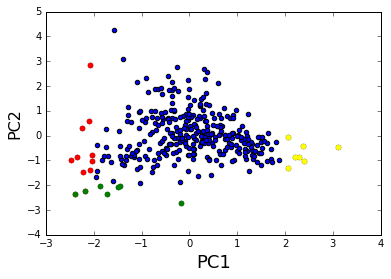

In [106]:
t1 = ndata[ndata['$pc1$'] < -2.0]
t2 = ndata[ndata['$pc2$'] < -2.0]
t3 = ndata[ndata['$pc1$'] > 2.0]
plt.scatter(ndata['$pc1$'], ndata['$pc2$'])
plt.scatter(t1['$pc1$'], t1['$pc2$'], color='r')
plt.scatter(t2['$pc1$'], t2['$pc2$'], color='g')
plt.scatter(t3['$pc1$'], t3['$pc2$'], color='yellow')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=16)
plt.show()

Each point in the plot is an observation. Highlighted (red, green and yellow) points have some interesting characteristics. For example, green points represent observations that has low PC1 and low PC2 values. We can interpret these points depending on what original variables are best represent the PC1 and PC2 values. You can continue to do this with all the other PCs.
